In [1]:
# importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from itertools import cycle, islice

<b>(a) Task 1:[2 marks] <br>
Apply DBSCAN on the dataset given in data.csv to group the data into clusters and also
predict the outliers (noise points). Plot in 2D the clusters obtained along with the noise points for a clear
visualisation.</b>

In [2]:
# reading the dataset
df=pd.read_csv('data.csv',header=None)
df.head()

,0,1
0,3.06,5.64
1,2.76,4.38
2,3.24,5.68
3,3.49,7.80
4,2.69,4.32


In [3]:
# checking the shape
df.shape

(178, 2)

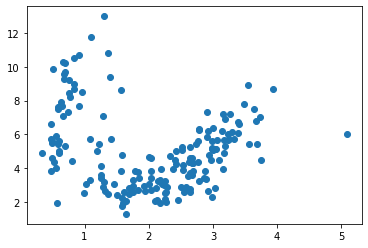

In [4]:
# plotting the raw data
plt.scatter(df[0],df[1])

In [7]:
# utility function to draw the clustered diagram
def plot_result(labels, core_samples_mask):
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
            for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        # Plot core points
        xy = df[class_member_mask & core_samples_mask]
        plt.plot(xy[0], xy[1], 'o', markerfacecolor=tuple(col),
                markeredgecolor='k', markersize=14)

        # Plot non-core points
        xy = df[class_member_mask & ~core_samples_mask]
        plt.plot(xy[0], xy[1], 'o', markerfacecolor=tuple(col),
                markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()
    plt.close()

# Checking what can be the number of clusters using kmeans and Silhoutte Score

In [9]:
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.cluster import KMeans

In [10]:
clusters=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
for i in clusters:
    clust=KMeans(n_clusters=i)
    labels=clust.fit_predict(df)
    silhouetteScore=silhouette_score(df,labels)
    print('for cluster',i,'Score:',silhouetteScore)

for cluster 2 Score: 0.5387883327231593
for cluster 3 Score: 0.46388634214287316
for cluster 4 Score: 0.49955447708073825
for cluster 5 Score: 0.4740869762697968
for cluster 6 Score: 0.47230674498076974
for cluster 7 Score: 0.4578588542652103
for cluster 8 Score: 0.40588476107493787
for cluster 9 Score: 0.4152926036278493
for cluster 10 Score: 0.39056018698435535
for cluster 11 Score: 0.3939606731343
for cluster 12 Score: 0.37240005353782146
for cluster 13 Score: 0.3841331331125331
for cluster 14 Score: 0.3754826497721325
for cluster 15 Score: 0.3824094892283092
for cluster 16 Score: 0.38912996748671697
for cluster 17 Score: 0.37284024279883193
for cluster 18 Score: 0.37836918093975475


<b>Best Silhouette Score is for Cluster 2. So, 2 can be an optimal choice.</b>

# Using Euclidean Distance Method for finding optimal epsilon distance

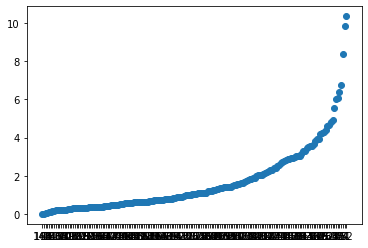

In [11]:
df=df.sort_values(by=[0,1])
df2=pd.DataFrame(columns=['index','distance'])

for i in range(len(df)-1):
    distance=np.linalg.norm(df.iloc[i]-df.iloc[i+1])
    df2=df2.append({'index':str(i),'distance':distance},ignore_index=True)

df2=df2.sort_values(by=['distance'])
plt.scatter(df2['index'],df2['distance'])
plt.show()

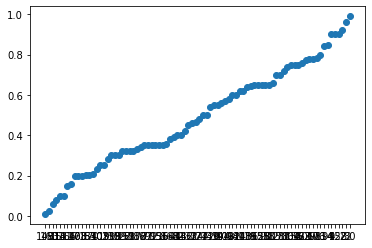

In [12]:
df3=df2[df2['distance']<1]
df3=df3.sort_values(by=['distance'])
plt.scatter(df3['index'],df3['distance'])
plt.show()

## Using Silhouette distance to find optimal eps

In [24]:
eps_range=[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in eps_range:
    print('eps_value: ',i)
    model=DBSCAN(eps=i,min_samples=5).fit(df)
    core_samples_mask=np.zeros_like(model.labels_,dtype=bool)
    core_samples_mask[model.core_sample_indices_] = True
    labels = model.labels_
    silhouette_avg=silhouette_score(df,labels)
    print('score: ',silhouette_avg)
    print('----------------')

eps_value:  0.2
score:  -0.3408962242787458
----------------
eps_value:  0.3
score:  -0.015251949159553257
----------------
eps_value:  0.4
score:  0.15541208570072812
----------------
eps_value:  0.5
score:  0.24492805636970322
----------------
eps_value:  0.6
score:  0.2668265387898636
----------------
eps_value:  0.7
score:  0.5151581850406296
----------------
eps_value:  0.8
score:  0.5161430699867074
----------------
eps_value:  0.9
score:  0.43874626179571646
----------------


<b>From above we can see that optimal value for eps is 0.8 having maximum vale of Silhouette score</b>

# Finding optimal min_sample value

In [25]:
min_samples=[1,2,3,4,5,6,7,8,9,10]
for i in min_samples:
    print('min_sample',i)
    model=DBSCAN(eps=0.8,min_samples=i).fit(df)
    core_samples_mask=np.zeros_like(model.labels_,dtype=bool)
    core_samples_mask[model.core_sample_indices_] = True
    
    labels=set([label for label in model.labels_ if label>=0])
    print('no of cluster',len(set(labels)))
    print('-----------')

min_sample 1
no of cluster 5
-----------
min_sample 2
no of cluster 2
-----------
min_sample 3
no of cluster 1
-----------
min_sample 4
no of cluster 1
-----------
min_sample 5
no of cluster 2
-----------
min_sample 6
no of cluster 2
-----------
min_sample 7
no of cluster 2
-----------
min_sample 8
no of cluster 2
-----------
min_sample 9
no of cluster 2
-----------
min_sample 10
no of cluster 2
-----------


# Applying DBSCAN

In [50]:
model=DBSCAN(eps=0.8,min_samples=5).fit(df)
core_samples_mask=np.zeros_like(model.labels_,dtype=bool)
core_samples_mask[model.core_sample_indices_] = True
labels = model.labels_

In [51]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# printing 2 D plot of clusters

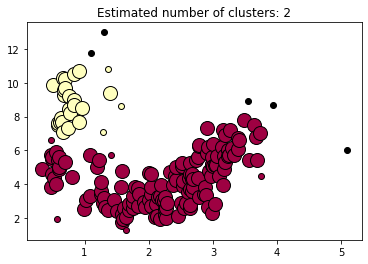

Estimated number of clusters: 2
Estimated number of noise points: 5


In [52]:
plot_result(labels, core_samples_mask)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


In [33]:
print(labels)

[ 0  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  0  1  1  1  1  1  1
  1  1  0  1  1  1  1  1  0  1  1  1  1  1  1  0  0  0  0 -1  0  0  0  0
  0  0  1  0 -1  0  0  1  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0  0 -1 -1]


<b>(b) Task 2:[1 mark] <br>
Add a column "Outliers" in data.csv which will contain value -1 for noise points and value
0 otherwise. You have to rename data.csv to Firstname Lastname assignment8.csv and submit. Marks will
be given to best 5 noise point predictions.</b>

In [57]:
outliers=labels[:]

In [58]:
for i in range(len(outliers)):
    if outliers[i]!=-1:
        outliers[i]=0

In [65]:
outliers=pd.Series(outliers,name="Outliers")

In [66]:
final=pd.concat([df,outliers],axis=1)
final.head()

,0,1,Outliers
0,3.06,5.64,0
1,2.76,4.38,0
2,3.24,5.68,0
3,3.49,7.80,0
4,2.69,4.32,0


In [67]:
final.to_csv("Abhichal_Assignment8.csv",index=None)